In [1]:
#selecionar prótons
#selecionar eventons com 2 múons
# '' com 2 elétrons
# evento misto: 1 eletron e 1 múon com maior PT <- 

#import sys,os
#os.system("cat /eos/cms/store/group/phys_pps/Phase2/LHE/EFT/AAWW/FPMC_WW_14TeV_a0w_0E0_aCw_0E0_noHADR_pt0/split/FPMC_WW_14TeV_a0w_0E0_aCw_0E0_noHADR_pt0_0.lhe.xz")
#ls /eos/cms/store/group/phys_pps/Phase2/Delphes/PU200/FPMC_WW_14TeV_a0w_0E0_aCw_0E0_noHADR_pt0_ZLepDecays_Delphes_PU200

In [2]:
import uproot4
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
path='/eos/cms/store/group/phys_pps/Phase2/Delphes/PU200/FPMC_WW_14TeV_a0w_0E0_aCw_0E0_noHADR_pt0_ZLepDecays_Delphes_PU200/'
name='FPMC_WW_14TeV_a0w_0E0_aCw_0E0_noHADR_pt0_0_ZLepDecays_Delphes_PU200.root'

file=path+name
root=uproot4.open(file)

In [4]:
root.keys()

['ProcessID0;1', 'Delphes;1']

In [5]:
root.classnames()

{'ProcessID0;1': 'TProcessID', 'Delphes;1': 'TTree'}

In [6]:
root['Delphes']

<TTree 'Delphes' (58 branches) at 0x7f5c80559310>

In [7]:
tree = root['Delphes']
tree.keys()

['Event',
 'Event/Event.fUniqueID',
 'Event/Event.fBits',
 'Event/Event.Number',
 'Event/Event.ReadTime',
 'Event/Event.ProcTime',
 'Event/Event.ProcessID',
 'Event/Event.MPI',
 'Event/Event.Weight',
 'Event/Event.CrossSection',
 'Event/Event.CrossSectionError',
 'Event/Event.Scale',
 'Event/Event.AlphaQED',
 'Event/Event.AlphaQCD',
 'Event/Event.ID1',
 'Event/Event.ID2',
 'Event/Event.X1',
 'Event/Event.X2',
 'Event/Event.ScalePDF',
 'Event/Event.PDF1',
 'Event/Event.PDF2',
 'Event_size',
 'Weight',
 'Weight/Weight.fUniqueID',
 'Weight/Weight.fBits',
 'Weight/Weight.Weight',
 'Weight_size',
 'GenProton',
 'GenProton/GenProton.fUniqueID',
 'GenProton/GenProton.fBits',
 'GenProton/GenProton.PID',
 'GenProton/GenProton.Status',
 'GenProton/GenProton.IsPU',
 'GenProton/GenProton.M1',
 'GenProton/GenProton.M2',
 'GenProton/GenProton.D1',
 'GenProton/GenProton.D2',
 'GenProton/GenProton.Charge',
 'GenProton/GenProton.Mass',
 'GenProton/GenProton.E',
 'GenProton/GenProton.Px',
 'GenProton/Ge

In [8]:
Vertex_Size=tree['Vertex_size'].array()
n_events=len(Vertex_Size)
print(Vertex_Size)
print(n_events)
print(np.sum(Vertex_Size))

[201, 207, 198, 220, 187, 181, 225, 226, ... 196, 187, 193, 193, 186, 205, 201, 186]
250
50017


# Making some plots 


[Text(0.5, 0, 'Número de múons no evento'),
 Text(0, 0.5, 'Número de Muons eventos')]

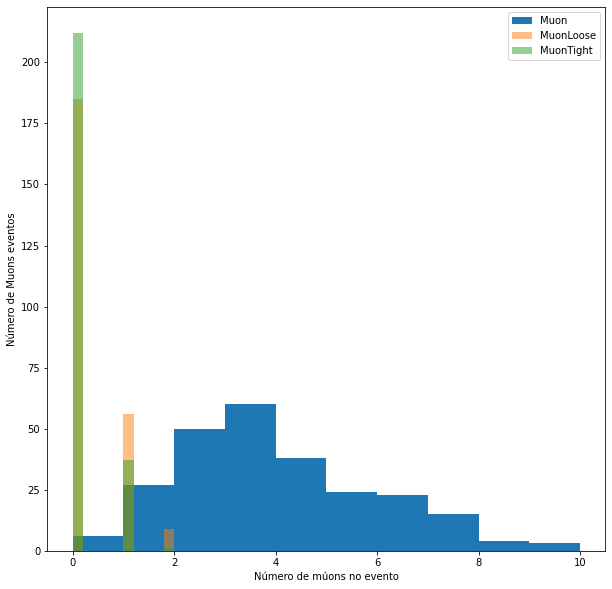

In [9]:
# Histogram for n_muons
Muon=tree['Muon_size'].array()
MuonLoose=tree['MuonLoose_size'].array()
MuonTight=tree['MuonTight_size'].array()
f,ax = plt.subplots(figsize=(10,10))
plt.hist(Muon, bins=10, range=(0,10),label='Muon',alpha=1)
plt.hist(MuonLoose, bins=10,label='MuonLoose',alpha=0.5)
plt.hist(MuonTight, bins=10,label='MuonTight',alpha=0.5)
ax.legend(); 
ax.set(xlabel='Número de múons no evento', ylabel='Número de Muons eventos')

[585, 595, 563, 626, 537, 511, 691, 694, ... 546, 543, 539, 559, 554, 576, 565, 531]


(array([ 1.,  1.,  9., 51., 69., 55., 45., 12.,  5.,  2.]),
 array([419. , 452.4, 485.8, 519.2, 552.6, 586. , 619.4, 652.8, 686.2,
        719.6, 753. ]),
 <BarContainer object of 10 artists>)

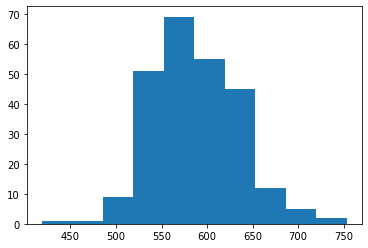

In [10]:
protons_por_evento=tree['GenProton'].array()
print(protons_por_evento)
plt.hist(protons_por_evento,bins=10)

In [11]:
# single beam energy:
ebeam=7000.
# collision energy:
ecms=2*ebeam
# xi acceptance from Table 4 on page 40 of https://cds.cern.ch/record/2750358/files/NOTE2020_008.pdf:
_mode='vertical'
xi_min = 0.0147 # using the 234m station
xi_max = 0.196 # using the 196m station
pz_min = (1-xi_max)*ebeam
pz_max = (1-xi_min)*ebeam
# print limiting xi and pz:
pz_min1 =(1-1.08*xi_max)*ebeam
pz_max1 =(1-0.92*xi_min)*ebeam
print('For xi range of (%2.3f,%2.3f) proton pz is in range from %2.2f to %2.2f GeV'%(xi_min,xi_max,pz_min,pz_max))
print(pz_min1)
print(pz_max1)

For xi range of (0.015,0.196) proton pz is in range from 5628.00 to 6897.10 GeV
5518.24
6905.332


In [12]:
Protons_Pz = tree['GenProton.Pz'].array()
Pz_mask = (abs(Protons_Pz) > (pz_min)) & (abs(Protons_Pz) < (pz_max))

print(Protons_Pz)
print(Pz_mask)
np.sum(Pz_mask)

[[6.73e+03, -6.78e+03, -1.52, -33.2, -1.72e+03, ... -9.81, -453, 1.2e+03, 3.15]]
[[True, True, False, False, False, False, ... False, False, False, False, False]]


2568

In [13]:
protons = tree.arrays(['GenProton.Pz','GenProton.Z','GenProton.IsPU','GenProton.T'],  cut="(abs(GenProton.Pz)>%g) & (abs(GenProton.Pz)<%g)"%(pz_min,pz_max))
print(len(protons))

250


In [14]:
zpos=23400

# time resolution for main vertex:
tvertex=40e-12
# time resolution for proton in PPS:
tpps=30e-12

convert_nanosec=1e9
trP=(convert_nanosec)*tpps
trM=(convert_nanosec)*tvertex


# setting initial vars:
N_Protons=np.zeros(len(protons)).astype(int) # number of protons in each event that pass the PPS criteria
GenProton_pz=protons['GenProton.Pz']
GenProton_vz=protons['GenProton.Z']
GenProton_ispu=protons['GenProton.IsPU']
GenProton_t=(convert_nanosec)*protons['GenProton.T'] # convert timing to nanosec

# setting vars for elements passing criteria of pz_min and pz_max of protons:
PassPz_Proton_pz=[]
PassPz_Proton_vz=[]
PassPz_Proton_ispu=[]
PassPz_Proton_t=[]
PassPz_Proton_tsmeared=[]
PassPz_Proton_xi=[]
PassPz_Proton_PU=[]

# store sign of proton:
sig=[]

In [15]:
# loop over events in GenProton_pz branch:
for i in tqdm(range(len(GenProton_pz))):
    _pz=GenProton_pz[i]
    _xi=1-np.abs(_pz)/ebeam
    # smear with 2% uncertainty:
    _uncert=0.02
    _xi_smear=_xi*(1+np.random.normal(0,_uncert,len(_xi)))
    _pz_smear=ebeam*(1-_xi_smear)
    _t=np.zeros(len(_pz))
    
    # converting light speed from m/s to cm/ns:
    convert_m_to_cm=1e2
    c=3e8 # why not 299 792 458 m/s ?
    lightspeed=c*convert_m_to_cm/convert_nanosec
    
    # loop over proton pz and store timing:
    for k in range(len(_pz)):
        if _pz[k]>0:
            _t[k]=(GenProton_t[i][k]+(zpos-GenProton_vz[i][k])/lightspeed)
        else: 
            _t[k]=(GenProton_t[i][k]+(zpos+GenProton_vz[i][k])/lightspeed)

    # smear timing around PPS resolution:
    _tsmear=_t+np.random.normal(0,trP,len(_t))
    
    # a counter for protons:
    _Npr=0

    # PassPz :: loop over proton pz and store passing events within smearing:
    # [i] == event
    # [k] == proton in event
    for k in range(len(_pz)):
        if (abs(_pz_smear[k])>pz_min) and (abs(_pz_smear[k])<pz_max):
            sig.append(np.sign(_pz[k])) #Storing the Pz sign of each proton
            PassPz_Proton_pz.append(_pz_smear[k])
            PassPz_Proton_xi.append(_xi_smear[k])
            PassPz_Proton_vz.append(GenProton_vz[i][k])
            PassPz_Proton_PU.append(GenProton_ispu[i][k])
            PassPz_Proton_t.append(_t[k])
            PassPz_Proton_tsmeared.append(_tsmear[k])
            _Npr=_Npr+1
    
    # count number of protons passing PPS criteria after the smearing
    N_Protons[i]=_Npr

100%|██████████| 250/250 [00:01<00:00, 141.70it/s]


O número de eventos é: 250
The total number of protons that passed the criteria is 2549


(array([ 1.,  5., 16., 16., 69., 62., 33., 28., 15.,  4.]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

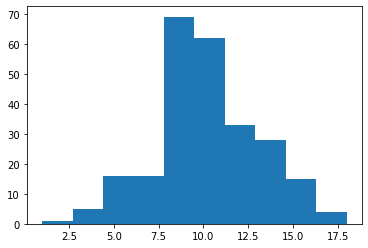

In [16]:
print('O número de eventos é:', len(N_Protons))
print('The total number of protons that passed the criteria is', np.sum(N_Protons))
plt.hist(N_Protons, bins=10, range=(1,18))
#for i in range(len(N_Protons)):
 #   print(N_Protons[i])

At this point the vector N_Protons has stored the number of protons on each event that passed the PPS criteria after the smearing. This vetor is important because it's order contains how many (and which) protons are present in each event. In the next steps, when analysing the leptons, we must keep track of which event those leptons came from. This is done by keeping the order of each of those 250 events in the vector. 

In [17]:
print("The total number of protons lost after applying the smearing was",  np.sum(Pz_mask)-np.sum(N_Protons))

The total number of protons lost after applying the smearing was 19


# Sorting Protons by Pz Direction

In [18]:
# prep store for proton sign and pairs:
ProtonsNeg = np.zeros(n_events)
ProtonsPos = np.zeros(n_events)
N_Pairs = np.zeros(n_events) # possible combinations for 2 protons on both sectors
###nprot = np.zeros(n_events) # can be removed?

# simple counter:
_count=0

# loop over protons that passed the PassPz criteria:
# ev == event (first index)
# nprotons == secondary index to loop over protons in event (ev)
for ev,_nprotons in tqdm(enumerate(N_Protons)):
    # check sign:
    for i in range(_nprotons):
        if (sig[_count+i]>0):
            ProtonsPos[ev] = ProtonsPos[ev]+1
        else:
            ProtonsNeg[ev] = ProtonsNeg[ev]+1
        N_Pairs = ProtonsPos*ProtonsNeg
    _count = _count + _nprotons

250it [00:00, 73347.51it/s]


In [19]:
print(np.sum(ProtonsPos)+np.sum(ProtonsNeg))

2549.0


# Analyzing Electrons and Muons separetely 

Gathering variables for Electrons and Muons and defining usefull vectors.

In [20]:
#ELECTRON TIGHT

N_TElectrons=tree['ElectronTight_size'].array()
TElectron_pt=tree['ElectronTight.PT'].array()
TElectron_eta=tree['ElectronTight.Eta'].array()
TElectron_phi=tree['ElectronTight.Phi'].array()
TElectron_T=tree['ElectronTight.T'].array()


VertexT_CMS=(convert_nanosec)*tree['Vertex.T'].array() # converted to nanosec

TElectron_VT=VertexT_CMS+np.random.normal(0,trM,len(VertexT_CMS)) 
TElectron_Vz=tree['Vertex.Z'].array() #This is the same for all particles


AllTElectron_eta=[]
AllTElectron_pt=[]
AllTElectron_phi=[]
noTElectrons=np.zeros((len(N_TElectrons)))


# Setting all variables for Electrons Tight:
TElectron_yll=[]
TElectron_yll=[]
TElectron_SumET=[]
TElectron_SumPz=[]
TElectron_mll=[]
TElectron_mll=[]
TElectron_Lead_pt=[] # leading Electron
TElectron_SubL_pt=[] # subleading Electron
TElectron_T=[]
TElectron_z=[]

#MUONS

N_Muons=tree['Muon_size'].array()
Muon_pt=tree['Muon.PT'].array()
Muon_eta=tree['Muon.Eta'].array()
Muon_phi=tree['Muon.Phi'].array()
Muon_T=tree['Muon.T'].array()
#Muon_z=tree_['Vertex.Z'].array()

#MUONS TIGHT
N_TMuons=tree['MuonTight_size'].array()
TMuon_pt=tree['MuonTight.PT'].array()
TMuon_eta=tree['MuonTight.Eta'].array()
TMuon_phi=tree['MuonTight.Phi'].array()
VertexT_CMS=(convert_nanosec)*tree['Vertex.T'].array() # converted to nanosec
TMuon_VT=VertexT_CMS+np.random.normal(0,trM,len(VertexT_CMS))
TMuon_Vz=tree['Vertex.Z'].array()

# setting initial vars for muons:
Muon_yll=[]
TMuon_yll=[]
TMuon_SumET=[]
TMuon_SumPz=[]
Muon_mll=[]
TMuon_mll=[]
TMuon_Lead_pt=[] # leading muon
TMuon_SubL_pt=[] # subleading muon
TMuon_T=[]
TMuon_z=[]

# Definindo coisas pro Muon:
Muon_Lead_pt=[]
Muon_Sub_pt=[]

# for muons before selection
AllTMuon_eta=[]
AllTMuon_pt=[]
AllTMuon_phi=[]

# save events without tight muon plus 2 protons:
noMuons=np.zeros((len(N_TMuons)))

For event we must find the Muons and Electrons with greater 'pt' (leading) and second greater 'pt' (subleading).

In [21]:
#loop over electrons tight:

for _ev,_nelec in tqdm(enumerate(N_TElectrons)):
    # reset muon kinematics:
    _e1_pt=0; _e1_eta=0; _e1_phi=0; _e1_t=0; _e1_z=0
    _e2_pt=0; _e2_eta=0; _e2_phi=0; _e2_t=0; _e2_z=0

    for i in range(_nelec):
        # search for leading electron:
        if TElectron_pt[_ev][i]>_e1_pt:
            # store subleading electron:
            _e2_pt = _e1_pt
            _e2_eta = _e1_eta
            _e2_phi = _e1_phi     
            # store leading electron:
            _e1_pt = TElectron_pt[_ev][i]
            _e1_eta = TElectron_eta[_ev][i]
            _e1_phi = TElectron_phi[_ev][i]
        elif TElectron_pt[_ev][i]>_e2_pt:
            # if last, store subleading muon:
            _e2_pt = TElectron_pt[_ev][i]
            _e2_eta = TElectron_eta[_ev][i]
            _e2_phi = TElectron_phi[_ev][i]

    # Eta for all Electrons
    AllTElectron_eta.append(_e1_eta)
    AllTElectron_eta.append(_e2_eta)
    
    #Pt for all Electrons
    AllTElectron_pt.append(_e1_pt)
    AllTElectron_pt.append(_e2_pt)
    
    #Phi for all Electrons
    AllTElectron_phi.append(_e1_phi)
    AllTElectron_phi.append(_e2_phi)
    
    # if valid event with 2 ELECTRONS and 2 PROTONS in PPS:
    if (_e1_pt!=0) and (_e2_pt!=0) and (ProtonsPos[_ev]!=0) and (ProtonsNeg[_ev]!=0):
        # save the leading and subleading electrons:
        TElectron_Lead_pt.append(_e1_pt)
        TElectron_SubL_pt.append(_e2_pt)
        ########### compute invariant mass of lepton pair:
        TElectron_SumET.append(_e1_pt*np.cosh(_e1_eta)+_e2_pt*np.cosh(_e2_eta)) # sumET = pt1*cosh(eta1) + pt2*cosh(eta2)
        _sumTPx = _e1_pt*np.cos(_e1_phi)+_e2_pt*np.cos(_e2_phi) # sumTPx = pt1*cos(phi1) + pt2*cos(phi2)
        _sumTPy = _e1_pt*np.sin(_e1_phi)+_e2_pt*np.sin(_e2_phi) # sumTPy = pt1*sin(phi1) + pt2*sin(phi2)
        TElectron_SumPz.append(_e1_pt*np.sinh(_e1_eta)+_e2_pt*np.sinh(_e2_eta))  # sumTPz = pt1*sinh(eta1) + pt2*sinh(eta2)
        # building the dilepton:
        #_di_TMuonP = np.sqrt(_sumTPx**2 + _sumTPy**2 + ( _mu1_pt*np.sinh(_mu1_eta)+_mu2_pt*np.sinh(_mu2_eta) )**2)
        _di_TElectronP = np.sqrt( _sumTPx**2 + _sumTPy**2 + TElectron_SumPz[-1]**2 )
        #_mllt2 = (_mu1_pt*np.cosh(_mu1_eta)+_mu2_pt*np.cosh(_mu2_eta))**2 - _di_TMuonP**2  # - sumTPx**2 - sumTPy**2 - sumTPz**2
        _mllt2 = TElectron_SumET[-1]**2 - _di_TElectronP**2
        # physics check:
        if(_mllt2<0): _mllt2=0
        TElectron_mll.append(np.sqrt(_mllt2))
        #TMuon_yll[_ev]=_mu1_eta+_mu2_eta
        TElectron_T.append(TElectron_VT[_ev])
        TElectron_z.append(TElectron_Vz[_ev])
        # define rapidity of dilepton:
        #TMuon_yll = (1/2) log (sumET+sumTPz/sumET-sumTPz)
        #TMuon_yll.append(0.5*np.log(((_mu1_pt*np.cosh(_mu1_eta)+_mu2_pt*np.cosh(_mu2_eta))+(_mu1_pt*np.sinh(_mu1_eta)+_mu2_pt*np.sinh(_mu2_eta)))/((_mu1_pt*np.cosh(_mu1_eta)+_mu2_pt*np.cosh(_mu2_eta))-(_mu1_pt*np.sinh(_mu1_eta)+_mu2_pt*np.sinh(_mu2_eta)))))
        # compute rapidity from last object appended ([-1])
        TElectron_yll.append( 0.5*np.log( (TElectron_SumET[-1] + TElectron_SumPz[-1])/(TElectron_SumET[-1] - TElectron_SumPz[-1]) ) )
    else: #if not 2 Electrons plus 2 protons:
        noTElectrons[_ev] = 1
    

250it [00:00, 18171.95it/s]


In [22]:
print(len(AllTElectron_eta))

500


In [23]:
# loop over tight muons:
for _ev,_nmuons in tqdm(enumerate(N_TMuons)):
    # reset muon kinematics:
    _mu1_pt=0; _mu1_eta=0; _mu1_phi=0; _mu1_t=0; _mu1_z=0
    _mu2_pt=0; _mu2_eta=0; _mu2_phi=0; _mu2_t=0; _mu2_z=0

    for i in range(_nmuons):
        # search for leading muon:
        if TMuon_pt[_ev][i]>_mu1_pt:
            # store subleading muon:
            _mu2_pt = _mu1_pt
            _mu2_eta = _mu1_eta
            _mu2_phi = _mu1_phi     
            # store leading muon:
            _mu1_pt = TMuon_pt[_ev][i]
            _mu1_eta = TMuon_eta[_ev][i]
            _mu1_phi = TMuon_phi[_ev][i]
        elif TMuon_pt[_ev][i]>_mu2_pt:
            # if last, store subleading muon:
            _mu2_pt = TMuon_pt[_ev][i]
            _mu2_eta = TMuon_eta[_ev][i]
            _mu2_phi = TMuon_phi[_ev][i]

    # Eta for all muons:
    AllTMuon_eta.append(_mu1_eta)
    AllTMuon_eta.append(_mu2_eta)  
        
    # Pt for all muons:
    AllTMuon_pt.append(_mu1_pt)
    AllTMuon_pt.append(_mu2_pt)
    
    # Phi for all muons:
    AllTMuon_phi.append(_mu1_phi)    
    AllTMuon_phi.append(_mu2_phi)
    
    
    
    # if valid event with 2 muons and 2 protons in PPS:
    if (_mu1_pt!=0) and (_mu2_pt!=0) and (ProtonsPos[_ev]!=0) and (ProtonsNeg[_ev]!=0):
        # save the muons for leading and subleading:
        TMuon_Lead_pt.append(_mu1_pt)
        TMuon_SubL_pt.append(_mu2_pt)
        # compute invariant mass of lepton pair:
        TMuon_SumET.append(_mu1_pt*np.cosh(_mu1_eta)+_mu2_pt*np.cosh(_mu2_eta)) # sumET = pt1*cosh(eta1) + pt2*cosh(eta2)
        _sumTPx = _mu1_pt*np.cos(_mu1_phi)+_mu2_pt*np.cos(_mu2_phi) # sumTPx = pt1*cos(phi1) + pt2*cos(phi2)
        _sumTPy = _mu1_pt*np.sin(_mu1_phi)+_mu2_pt*np.sin(_mu2_phi) # sumTPy = pt1*sin(phi1) + pt2*sin(phi2)
        TMuon_SumPz.append(_mu1_pt*np.sinh(_mu1_eta)+_mu2_pt*np.sinh(_mu2_eta))  # sumTPz = pt1*sinh(eta1) + pt2*sinh(eta2)
        # building the dilepton:
        #_di_TMuonP = np.sqrt(_sumTPx**2 + _sumTPy**2 + ( _mu1_pt*np.sinh(_mu1_eta)+_mu2_pt*np.sinh(_mu2_eta) )**2)
        _di_TMuonP = np.sqrt( _sumTPx**2 + _sumTPy**2 + TMuon_SumPz[-1]**2 )
        #_mllt2 = (_mu1_pt*np.cosh(_mu1_eta)+_mu2_pt*np.cosh(_mu2_eta))**2 - _di_TMuonP**2  # - sumTPx**2 - sumTPy**2 - sumTPz**2
        _mllt2 = TMuon_SumET[-1]**2 - _di_TMuonP**2
        # physics check:
        if(_mllt2<0): _mllt2=0
        TMuon_mll.append(np.sqrt(_mllt2))
        #TMuon_yll[_ev]=_mu1_eta+_mu2_eta
        TMuon_T.append(TMuon_VT[_ev])
        TMuon_z.append(TMuon_Vz[_ev])
        # define rapidity of dilepton:
        #TMuon_yll = (1/2) log (sumET+sumTPz/sumET-sumTPz)
        #TMuon_yll.append(0.5*np.log(((_mu1_pt*np.cosh(_mu1_eta)+_mu2_pt*np.cosh(_mu2_eta))+(_mu1_pt*np.sinh(_mu1_eta)+_mu2_pt*np.sinh(_mu2_eta)))/((_mu1_pt*np.cosh(_mu1_eta)+_mu2_pt*np.cosh(_mu2_eta))-(_mu1_pt*np.sinh(_mu1_eta)+_mu2_pt*np.sinh(_mu2_eta)))))
        # compute rapidity from last object appended ([-1])
        TMuon_yll.append( 0.5*np.log((TMuon_SumET[-1] + TMuon_SumPz[-1])/(TMuon_SumET[-1] - TMuon_SumPz[-1])))
    else:
        # if not 2 muons plus 2 protons:
        noMuons[_ev] = 1


250it [00:00, 16350.79it/s]


In [24]:
print(len(AllTMuon_eta))

500


At this point we have two vectors that contain information for each lepton after the selection. 
  
  For Muons:
    
    AllTMuon_eta;
    noMuons;
    
  For Electrons:
  
    AllElectrons_eta;
    noElectrons;
    
Note that in the vectors noMuons and noElectrons the components with 1 represent "NO" and those with 0 represent "YES" to the question: "Are there at least 2 leptons and 2 protons in the event?"

In [25]:
print("Vector with all Muons_Eta: \n",AllTMuon_eta)

print("Vector lengh is:",len(AllTMuon_eta))

print("\n Vector with all Electrons_Eta: \n", AllTElectron_eta)

print("Vector lengh is:",len(AllTElectron_eta))

Vector with all Muons_Eta: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.3373587131500244, 0, -0.19804717600345612, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.1827458143234253, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.13084416091442108, 0, 1.5350030660629272, 0, 0, 0, 1.32538640499115, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.1882710456848145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.5607466697692871, 0, 0, 0, -2.1467068195343018, 0, 0, 0, 1.83457612991333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.6694610118865967, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.7816543579101562, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.8024969100952148, 0, 1.276990532875061, 0, 0, 0, 1.1716018915176392, 0, 0, 0, 0, 0, 0, 0, 1.9418410062789917, 0, 0, 0

Now we must rearrange those vectors into arrays with 250 lines (one for each event) and 2 columns (for the leading and subleading).

In [26]:
print(AllTMuon_eta)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.3373587131500244, 0, -0.19804717600345612, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.1827458143234253, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.13084416091442108, 0, 1.5350030660629272, 0, 0, 0, 1.32538640499115, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -2.1882710456848145, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.5607466697692871, 0, 0, 0, -2.1467068195343018, 0, 0, 0, 1.83457612991333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.6694610118865967, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.7816543579101562, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.8024969100952148, 0, 1.276990532875061, 0, 0, 0, 1.1716018915176392, 0, 0, 0, 0, 0, 0, 0, 1.9418410062789917, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.427115

An attempt to organize leptons information in arrays with two components, one for the Leading lepton and the other for Subleading. The final array must have len=250, which is the number of events. 

In [27]:
w, h = 2, 250
Muon_eta = [[0] * w for i in range(h)]
TElectron_eta = [[0] * w for i in range(h)]


j=0
for i in range(len(N_Protons)):
         
        Muon_eta[i][0]=AllTMuon_eta[j]
        TElectron_eta[i][0]=AllTElectron_eta[j]
        
        Muon_eta[i][1]=AllTMuon_eta[j+1]
        TElectron_eta[i][1]=AllTElectron_eta[j+1]

        j=2*(i+1)

print('\n Vector containing pairs of Leading and Sub_Leading for Electrons: \n', Muon_eta)

print('\n Vector containing pairs of Leading and Sub_Leading for Muons: \n', TElectron_eta)



 Vector containing pairs of Leading and Sub_Leading for Electrons: 
 [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1.3373587131500244, 0], [-0.19804717600345612, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [-1.1827458143234253, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0.13084416091442108, 0], [1.5350030660629272, 0], [0, 0], [1.32538640499115, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [-2.1882710456848145, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [-0.5607466697692871, 0], [0, 0], [-2.1467068195343018, 0], [0, 0], [1.83457612991333, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1.6694610118865967, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [-1.7816543

In [28]:
#_valid_events_M (_valid_events_E) are the events with 2 Muons (Electrons) and 2 Protons

print("Vector containing the number of valid events Muons: \n",noMuons)
print("\nVector containing the number of valid events for Electrons: \n", noTElectrons)

_valid_events_M=0
_valid_events_E=0

for i in range(len(noMuons)):
    if noMuons[i]==0:
        _valid_events_M=_valid_events_M+1

        
for i in range(len(noTElectrons)):
    if noTElectrons[i]==0:
        _valid_events_E=_valid_events_E+1
        

print("\n\nThe number of events with at least 2 Muons and 2 Protons is:", _valid_events_M)

print("The number of events with at least 2 Electrons and 2 Protons is:", _valid_events_E)

Vector containing the number of valid events Muons: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Vector containing the number of valid events for Electrons: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [29]:
#Counting the number of Muons and Electrons obtained:

_n_TMuons=0
_n_TElectrons=0

for i in range(len(AllTMuon_eta)):
    if AllTMuon_eta[i]!=0:
        _n_TMuons=_n_TMuons+1
    if AllTElectron_eta[i]!=0:
        _n_TElectrons=_n_TElectrons+1

print("The number of TMuons is:", _n_TMuons)
print("The number of Electrons is:", _n_TElectrons)

The number of TMuons is: 39
The number of Electrons is: 35


Now we must find events that contain at least 1 Muon and 1 Electron together with 2 protons in PPS. For this purpouse we can use the vector that contains Muons and Electrons individually and compare them. After that, we must check kinematics with 'crossed variables'.

In [30]:
#Checking which events contain two protons:

Yes_2Protons=np.zeros(n_events)

for _ev in range(n_events): #250 is the number of events
    if ((ProtonsPos[_ev]!=0) and (ProtonsNeg[_ev]!=0)):
        Yes_2Protons[_ev]=1

print('At least 2 protons = 1. Less than 2 protons = 0')
print(Yes_2Protons)


At least 2 protons = 1. Less than 2 protons = 0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Let's count how many events have 2 protons and 1 electron + 1 muon.

In [31]:
Electron_Muon=[[0] * w for i in range(h)]

for i in range(n_events):
    
    #if Muon_eta[i][0]!=0 + Electron_eta[i][0]!=0
    if (Yes_2Protons[i]==1) and (Muon_eta[i][0]!=0) and (Muon_eta[i][1]==0) and (TElectron_eta[i][0]!=0) and (TElectron_eta[i][1]==0):
        
        Electron_Muon[_ev][0]=Muon_eta[i][0]
        Electron_Muon[_ev][1]=TElectron_eta[i][0]
        
    #if Muon_eta[i][1]!=0 + Electron_eta[i][1]!=0
    if (Yes_2Protons[i]==1) and (Muon_eta[i][0]==0) and (Muon_eta[i][1]!=0) and (TElectron_eta[i][0]==0) and (TElectron_eta[i][1]!=0):
               
        Electron_Muon[_ev][0]=Muon_eta[i][1]
        Electron_Muon[_ev][1]=TElectron_eta[i][1]
     
    #if Muon_eta[i][0]!=0 + Electron_eta[i][1]!=0
    if (Yes_2Protons[i]==1) and (Muon_eta[i][0]==0) and (Muon_eta[i][1]!=0) and (TElectron_eta[i][0]==0) and (TElectron_eta[i][1]!=0):
               
        Electron_Muon[_ev][0]=Muon_eta[i][0]
        Electron_Muon[_ev][1]=TElectron_eta[i][1]
    
    #if Muon_eta[i][1]!=0 + Electron_eta[i][0]!=0
    if (Yes_2Protons[i]==1) and (Muon_eta[i][0]==0) and (Muon_eta[i][1]!=0) and (TElectron_eta[i][0]==0) and (TElectron_eta[i][1]!=0):
               
        Electron_Muon[_ev][0]=Muon_eta[i][1]
        Electron_Muon[_ev][1]=TElectron_eta[i][0]
        
print(Electron_Muon)

[[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0],

We now have an array named 'Electron_Muon' in which each component has an ordered pair with the 'eta' of 1 Electron and 1 Muon. We can now use the vectors containing the information about the presence of leptons and protons to check wich events are available with 1 electron + 1 muon and 2 protons. Then we must check the kinematics as we did before. 